**Proyecto Final**

 **Integrantes**

_Lida Díaz Sotelo_

_Santiago Bautista Garzón_

_Walter Valencia Naranjo_ 

## Incidencia de los indicadores de salud en los problemas en la atención a las madres gestantes por parte de las IPS ##



## Primer Paso ##

Se extraen los datos necesarios para el estudio de la página del Banco Mundial sin tener que descargarla, se accede directamente desde la API y se abre para observar que todos los datos esten cargados correctamente, dado que el estudio será solo para Colombia, directamente desde la API se filtra para que solo se extraiga los datos de Colombia y no los de los démas países 

In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.linear_model import LinearRegression

# Traer api Banco Mundial para la variable: Nacimientos Asistidos Por Personal de Salud Capacitado (% del total)

dataset = ('https://api.worldbank.org/v2/country/COL/indicator/SH.STA.BRTC.ZS?'
          'per_page=61'
          '&format=json'
          '&date=1998:{}'. format(2021)  
           )

response = requests.get(dataset)


payload = response.json()

Nacidos_Asis_Personal_Capacitado = pd.DataFrame.from_dict(payload[1])

Nacidos_Asis_Personal_Capacitado

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SH.STA.BRTC.ZS', 'value': 'Births atte...","{'id': 'CO', 'value': 'Colombia'}",COL,2020,NaN,,,0
1,"{'id': 'SH.STA.BRTC.ZS', 'value': 'Births atte...","{'id': 'CO', 'value': 'Colombia'}",COL,2019,99.1,,,0
2,"{'id': 'SH.STA.BRTC.ZS', 'value': 'Births atte...","{'id': 'CO', 'value': 'Colombia'}",COL,2018,98.4,,,0
3,"{'id': 'SH.STA.BRTC.ZS', 'value': 'Births atte...","{'id': 'CO', 'value': 'Colombia'}",COL,2017,99.3,,,0
4,"{'id': 'SH.STA.BRTC.ZS', 'value': 'Births atte...","{'id': 'CO', 'value': 'Colombia'}",COL,2016,95.5,,,0
5,"{'id': 'SH.STA.BRTC.ZS', 'value': 'Births atte...","{'id': 'CO', 'value': 'Colombia'}",COL,2015,95.9,,,0
6,"{'id': 'SH.STA.BRTC.ZS', 'value': 'Births atte...","{'id': 'CO', 'value': 'Colombia'}",COL,2014,98.9,,,0
7,"{'id': 'SH.STA.BRTC.ZS', 'value': 'Births atte...","{'id': 'CO', 'value': 'Colombia'}",COL,2013,98.7,,,0
8,"{'id': 'SH.STA.BRTC.ZS', 'value': 'Births atte...","{'id': 'CO', 'value': 'Colombia'}",COL,2012,98.7,,,0
9,"{'id': 'SH.STA.BRTC.ZS', 'value': 'Births atte...","{'id': 'CO', 'value': 'Colombia'}",COL,2011,99.2,,,0


Se procede a subir el resto de datos necesarios para este estudio

In [2]:
## Datos del Banco Mundial sobre: Tasa de Mortalidad, menores de cinco años (por cada 1.000)

dataset = ('https://api.worldbank.org/v2/country/COL/indicator/SH.DYN.MORT?'
          'per_page=61'
          '&format=json'
          '&date=1998:{}'. format(2021)  
           )

response = requests.get(dataset)


payload = response.json()

Tasa_Muertes_Menor_5años = pd.DataFrame.from_dict(payload[1])

Tasa_Muertes_Menor_5años

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SH.DYN.MORT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2020,NaN,,,0
1,"{'id': 'SH.DYN.MORT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2019,13.8,,,0
2,"{'id': 'SH.DYN.MORT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2018,14.2,,,0
3,"{'id': 'SH.DYN.MORT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2017,14.7,,,0
4,"{'id': 'SH.DYN.MORT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2016,15.1,,,0
5,"{'id': 'SH.DYN.MORT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2015,15.6,,,0
6,"{'id': 'SH.DYN.MORT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2014,16.1,,,0
7,"{'id': 'SH.DYN.MORT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2013,16.7,,,0
8,"{'id': 'SH.DYN.MORT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2012,17.2,,,0
9,"{'id': 'SH.DYN.MORT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2011,17.8,,,0


In [3]:
## Datos Banco Mundial sobre: Tasa de Mortalidad, neonatal (Por cada 1.000 nacidos vivos)

dataset = ('https://api.worldbank.org/v2/country/COL/indicator/SH.DYN.NMRT?'
          'per_page=61'
          '&format=json'
          '&date=1998:{}'. format(2021)  
           )

response = requests.get(dataset)


payload = response.json()

Tasa_Muertes_Neonatales = pd.DataFrame.from_dict(payload[1])

Tasa_Muertes_Neonatales

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SH.DYN.NMRT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2020,NaN,,,0
1,"{'id': 'SH.DYN.NMRT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2019,7.5,,,0
2,"{'id': 'SH.DYN.NMRT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2018,7.7,,,0
3,"{'id': 'SH.DYN.NMRT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2017,8.0,,,0
4,"{'id': 'SH.DYN.NMRT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2016,8.2,,,0
5,"{'id': 'SH.DYN.NMRT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2015,8.5,,,0
6,"{'id': 'SH.DYN.NMRT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2014,8.8,,,0
7,"{'id': 'SH.DYN.NMRT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2013,9.1,,,0
8,"{'id': 'SH.DYN.NMRT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2012,9.4,,,0
9,"{'id': 'SH.DYN.NMRT', 'value': 'Mortality rate...","{'id': 'CO', 'value': 'Colombia'}",COL,2011,9.7,,,0


In [4]:
## Datos del Banco Mundial sobre: Esperanza de Vida al Nacer, Mujeres (años)

dataset = ('https://api.worldbank.org/v2/country/COL/indicator/SP.DYN.LE00.FE.IN?'
          'per_page=61'
          '&format=json'
          '&date=1998:{}'. format(2021)  
           )

response = requests.get(dataset)


payload = response.json()

Espe_Vida_Mujeres = pd.DataFrame.from_dict(payload[1])

Espe_Vida_Mujeres

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.DYN.LE00.FE.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2020,NaN,,,0
1,"{'id': 'SP.DYN.LE00.FE.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2019,80.019,,,0
2,"{'id': 'SP.DYN.LE00.FE.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2018,79.859,,,0
3,"{'id': 'SP.DYN.LE00.FE.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2017,79.694,,,0
4,"{'id': 'SP.DYN.LE00.FE.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2016,79.523,,,0
5,"{'id': 'SP.DYN.LE00.FE.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2015,79.346,,,0
6,"{'id': 'SP.DYN.LE00.FE.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2014,79.164,,,0
7,"{'id': 'SP.DYN.LE00.FE.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2013,78.978,,,0
8,"{'id': 'SP.DYN.LE00.FE.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2012,78.789,,,0
9,"{'id': 'SP.DYN.LE00.FE.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2011,78.598,,,0


In [5]:
## Datos del Banco Mundial sobre: Esperanza de Vida al Nacer, Hombres (años)

dataset = ('https://api.worldbank.org/v2/country/COL/indicator/SP.DYN.LE00.MA.IN?'
          'per_page=61'
          '&format=json'
          '&date=1998:{}'. format(2021)  
           )

response = requests.get(dataset)


payload = response.json()

Espe_Vida_Hombres = pd.DataFrame.from_dict(payload[1])

Espe_Vida_Hombres

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.DYN.LE00.MA.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2020,NaN,,,0
1,"{'id': 'SP.DYN.LE00.MA.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2019,74.528,,,0
2,"{'id': 'SP.DYN.LE00.MA.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2018,74.330,,,0
3,"{'id': 'SP.DYN.LE00.MA.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2017,74.124,,,0
4,"{'id': 'SP.DYN.LE00.MA.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2016,73.910,,,0
5,"{'id': 'SP.DYN.LE00.MA.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2015,73.686,,,0
6,"{'id': 'SP.DYN.LE00.MA.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2014,73.450,,,0
7,"{'id': 'SP.DYN.LE00.MA.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2013,73.205,,,0
8,"{'id': 'SP.DYN.LE00.MA.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2012,72.950,,,0
9,"{'id': 'SP.DYN.LE00.MA.IN', 'value': 'Life exp...","{'id': 'CO', 'value': 'Colombia'}",COL,2011,72.689,,,0


In [6]:
## Datos del Banco Mundial sobre: Esperanza de Vida al Nacer, Total (años)

dataset = ('https://api.worldbank.org/v2/country/COL/indicator/SP.DYN.LE00.IN?'
          'per_page=61'
          '&format=json'
          '&date=1998:{}'. format(2021)  
           )

response = requests.get(dataset)


payload = response.json()

Espe_Vida_Total = pd.DataFrame.from_dict(payload[1])

Espe_Vida_Total

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.DYN.LE00.IN', 'value': 'Life expect...","{'id': 'CO', 'value': 'Colombia'}",COL,2020,NaN,,,0
1,"{'id': 'SP.DYN.LE00.IN', 'value': 'Life expect...","{'id': 'CO', 'value': 'Colombia'}",COL,2019,77.287,,,0
2,"{'id': 'SP.DYN.LE00.IN', 'value': 'Life expect...","{'id': 'CO', 'value': 'Colombia'}",COL,2018,77.109,,,0
3,"{'id': 'SP.DYN.LE00.IN', 'value': 'Life expect...","{'id': 'CO', 'value': 'Colombia'}",COL,2017,76.925,,,0
4,"{'id': 'SP.DYN.LE00.IN', 'value': 'Life expect...","{'id': 'CO', 'value': 'Colombia'}",COL,2016,76.732,,,0
5,"{'id': 'SP.DYN.LE00.IN', 'value': 'Life expect...","{'id': 'CO', 'value': 'Colombia'}",COL,2015,76.531,,,0
6,"{'id': 'SP.DYN.LE00.IN', 'value': 'Life expect...","{'id': 'CO', 'value': 'Colombia'}",COL,2014,76.322,,,0
7,"{'id': 'SP.DYN.LE00.IN', 'value': 'Life expect...","{'id': 'CO', 'value': 'Colombia'}",COL,2013,76.105,,,0
8,"{'id': 'SP.DYN.LE00.IN', 'value': 'Life expect...","{'id': 'CO', 'value': 'Colombia'}",COL,2012,75.882,,,0
9,"{'id': 'SP.DYN.LE00.IN', 'value': 'Life expect...","{'id': 'CO', 'value': 'Colombia'}",COL,2011,75.655,,,0


## Segundo Paso ##

Luego de tener los datos debidamente cargados procedemos a una limpieza de cada una de las bases, ya que no necesitamos todas las columnas y al momento de unir todas las bases para obtener la base madre se necesita tener limpios los datos. 

In [7]:
Nacidos_Asis_Personal_Capacitado = Nacidos_Asis_Personal_Capacitado.drop(columns=["indicator", "country", "unit", "obs_status", "decimal"])

Nacidos_Asis_Personal_Capacitado.head()

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,99.1
2,COL,2018,98.4
3,COL,2017,99.3
4,COL,2016,95.5


In [8]:
Nacidos_Asis_Personal_Capacitado




,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,99.1
2,COL,2018,98.4
3,COL,2017,99.3
4,COL,2016,95.5
5,COL,2015,95.9
6,COL,2014,98.9
7,COL,2013,98.7
8,COL,2012,98.7
9,COL,2011,99.2


In [9]:
Tasa_Muertes_Menor_5años = Tasa_Muertes_Menor_5años.drop(columns=["indicator", "country", "unit", "obs_status", "decimal"])

Tasa_Muertes_Menor_5años.head()

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,13.8
2,COL,2018,14.2
3,COL,2017,14.7
4,COL,2016,15.1


In [10]:
Tasa_Muertes_Menor_5años

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,13.8
2,COL,2018,14.2
3,COL,2017,14.7
4,COL,2016,15.1
5,COL,2015,15.6
6,COL,2014,16.1
7,COL,2013,16.7
8,COL,2012,17.2
9,COL,2011,17.8


In [11]:
Tasa_Muertes_Neonatales = Tasa_Muertes_Neonatales.drop(columns=["indicator", "country", "unit", "obs_status", "decimal"])

Tasa_Muertes_Neonatales.head()

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,7.5
2,COL,2018,7.7
3,COL,2017,8.0
4,COL,2016,8.2


In [12]:
Tasa_Muertes_Neonatales

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,7.5
2,COL,2018,7.7
3,COL,2017,8.0
4,COL,2016,8.2
5,COL,2015,8.5
6,COL,2014,8.8
7,COL,2013,9.1
8,COL,2012,9.4
9,COL,2011,9.7


In [13]:
Espe_Vida_Mujeres = Espe_Vida_Mujeres.drop(columns=["indicator", "country", "unit", "obs_status", "decimal"])

Espe_Vida_Mujeres.head()

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,80.019
2,COL,2018,79.859
3,COL,2017,79.694
4,COL,2016,79.523


In [14]:
Espe_Vida_Mujeres

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,80.019
2,COL,2018,79.859
3,COL,2017,79.694
4,COL,2016,79.523
5,COL,2015,79.346
6,COL,2014,79.164
7,COL,2013,78.978
8,COL,2012,78.789
9,COL,2011,78.598


In [15]:
Espe_Vida_Hombres = Espe_Vida_Hombres.drop(columns=["indicator", "country", "unit", "obs_status", "decimal"])

Espe_Vida_Hombres.head()

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,74.528
2,COL,2018,74.330
3,COL,2017,74.124
4,COL,2016,73.910


In [16]:
Espe_Vida_Hombres

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,74.528
2,COL,2018,74.330
3,COL,2017,74.124
4,COL,2016,73.910
5,COL,2015,73.686
6,COL,2014,73.450
7,COL,2013,73.205
8,COL,2012,72.950
9,COL,2011,72.689


In [17]:
Espe_Vida_Total = Espe_Vida_Total.drop(columns=["indicator", "country", "unit", "obs_status", "decimal"])

Espe_Vida_Total.head()

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,77.287
2,COL,2018,77.109
3,COL,2017,76.925
4,COL,2016,76.732


In [18]:
Espe_Vida_Total

,countryiso3code,date,value
0,COL,2020,NaN
1,COL,2019,77.287
2,COL,2018,77.109
3,COL,2017,76.925
4,COL,2016,76.732
5,COL,2015,76.531
6,COL,2014,76.322
7,COL,2013,76.105
8,COL,2012,75.882
9,COL,2011,75.655


## Tercer Paso ##

Se procede a unir todas las bases de datos para conseguir una base madre, como con el comando MERGE solo se pueden concatenar de a 4 variables se procede a hacer eso con las primeras cuatro

In [19]:
df_merge_one = pd.merge(Nacidos_Asis_Personal_Capacitado, Tasa_Muertes_Menor_5años, how='left', left_on=['date', 'countryiso3code'], right_on=['date', 'countryiso3code'])
df_merge_one = df_merge_one.rename(columns={'value_x': 'Nacidos_Asis_Personal', 'value_y': 'Tasa_Muertes_Menor_5años'})

df_merge_two = pd.merge(Tasa_Muertes_Neonatales, Espe_Vida_Mujeres, how='left', left_on=['date', 'countryiso3code'], right_on=['date', 'countryiso3code'])
df_merge_two = df_merge_two.rename(columns={'value_x': 'Tasa_Muertes_Neonatales', 'value_y': 'Espe_Vida_Mujeres'})


df = pd.merge(df_merge_one, df_merge_two, how='left', left_on=['date', 'countryiso3code'], right_on=['date', 'countryiso3code'])

df

,countryiso3code,date,Nacidos_Asis_Personal,Tasa_Muertes_Menor_5años,Tasa_Muertes_Neonatales,Espe_Vida_Mujeres
0,COL,2020,NaN,NaN,NaN,NaN
1,COL,2019,99.1,13.8,7.5,80.019
2,COL,2018,98.4,14.2,7.7,79.859
3,COL,2017,99.3,14.7,8.0,79.694
4,COL,2016,95.5,15.1,8.2,79.523
5,COL,2015,95.9,15.6,8.5,79.346
6,COL,2014,98.9,16.1,8.8,79.164
7,COL,2013,98.7,16.7,9.1,78.978
8,COL,2012,98.7,17.2,9.4,78.789
9,COL,2011,99.2,17.8,9.7,78.598


Posterios a esto, nos quedan dos bases de datos sin unir, por esto se procede a unir estas dos primeras para posteriormente unirla a la base madre

In [20]:
base_parcial = pd.merge(Espe_Vida_Hombres, Espe_Vida_Total, how='left', left_on=['date', 'countryiso3code'], right_on=['date', 'countryiso3code'])
base_parcial = base_parcial.rename(columns={'value_x': 'Espe_Vida_Hombres', 'value_y': 'Espe_Vida_Total'})

base_parcial

,countryiso3code,date,Espe_Vida_Hombres,Espe_Vida_Total
0,COL,2020,NaN,NaN
1,COL,2019,74.528,77.287
2,COL,2018,74.330,77.109
3,COL,2017,74.124,76.925
4,COL,2016,73.910,76.732
5,COL,2015,73.686,76.531
6,COL,2014,73.450,76.322
7,COL,2013,73.205,76.105
8,COL,2012,72.950,75.882
9,COL,2011,72.689,75.655


Ahora si, se procede a crear la base_final para unir las 6 bases de datos que teniamos por aparte

In [21]:
base_final = pd.merge(df, base_parcial, how='left', left_on=['date', 'countryiso3code'], right_on=['date', 'countryiso3code'])
base_final

,countryiso3code,date,Nacidos_Asis_Personal,Tasa_Muertes_Menor_5años,Tasa_Muertes_Neonatales,Espe_Vida_Mujeres,Espe_Vida_Hombres,Espe_Vida_Total
0,COL,2020,NaN,NaN,NaN,NaN,NaN,NaN
1,COL,2019,99.1,13.8,7.5,80.019,74.528,77.287
2,COL,2018,98.4,14.2,7.7,79.859,74.330,77.109
3,COL,2017,99.3,14.7,8.0,79.694,74.124,76.925
4,COL,2016,95.5,15.1,8.2,79.523,73.910,76.732
5,COL,2015,95.9,15.6,8.5,79.346,73.686,76.531
6,COL,2014,98.9,16.1,8.8,79.164,73.450,76.322
7,COL,2013,98.7,16.7,9.1,78.978,73.205,76.105
8,COL,2012,98.7,17.2,9.4,78.789,72.950,75.882
9,COL,2011,99.2,17.8,9.7,78.598,72.689,75.655


Se elimina la primera fila ya que contiene NaN y esto puede ocasionar problemas más adelante en las regresiones

In [22]:
base_final.drop([0], axis=0)

,countryiso3code,date,Nacidos_Asis_Personal,Tasa_Muertes_Menor_5años,Tasa_Muertes_Neonatales,Espe_Vida_Mujeres,Espe_Vida_Hombres,Espe_Vida_Total
1,COL,2019,99.1,13.8,7.5,80.019,74.528,77.287
2,COL,2018,98.4,14.2,7.7,79.859,74.330,77.109
3,COL,2017,99.3,14.7,8.0,79.694,74.124,76.925
4,COL,2016,95.5,15.1,8.2,79.523,73.910,76.732
5,COL,2015,95.9,15.6,8.5,79.346,73.686,76.531
6,COL,2014,98.9,16.1,8.8,79.164,73.450,76.322
7,COL,2013,98.7,16.7,9.1,78.978,73.205,76.105
8,COL,2012,98.7,17.2,9.4,78.789,72.950,75.882
9,COL,2011,99.2,17.8,9.7,78.598,72.689,75.655
10,COL,2010,94.8,18.4,10.0,78.405,72.422,75.424


In [23]:
base_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   countryiso3code           23 non-null     object 
 1   date                      23 non-null     object 
 2   Nacidos_Asis_Personal     22 non-null     float64
 3   Tasa_Muertes_Menor_5años  22 non-null     float64
 4   Tasa_Muertes_Neonatales   22 non-null     float64
 5   Espe_Vida_Mujeres         22 non-null     float64
 6   Espe_Vida_Hombres         22 non-null     float64
 7   Espe_Vida_Total           22 non-null     float64
dtypes: float64(6), object(2)
memory usage: 2.2+ KB


## Cuarto Paso ## 

Se procede a analizar la base de datos con estadistica descriptiva 

In [24]:
## Promedio del porcentaje de nacidos que reciben asistencia médica especializada en el momento del parto ## 

print('La media de niños que reciben atención es:')
base_final["Nacidos_Asis_Personal"].mean()


La media de niños que reciben atención es:


95.84090909090907

In [25]:
## Tasa de muertes de niños menores de cinco años ##

print('La tasa de mortalidad en niños menores de cinco años por cada 1.000 nacidos es de:')
base_final["Tasa_Muertes_Menor_5años"].mean()

La tasa de mortalidad en niños menores de cinco años por cada 1.000 nacidos es de:


19.55454545454546

In [26]:
## Tasa de muertes neonatales ##

print('La tasa de mortalidad en niños recien nacidos menores de 28 días de nacido es de:')
base_final["Tasa_Muertes_Neonatales"].mean()

La tasa de mortalidad en niños recien nacidos menores de 28 días de nacido es de:


10.631818181818183

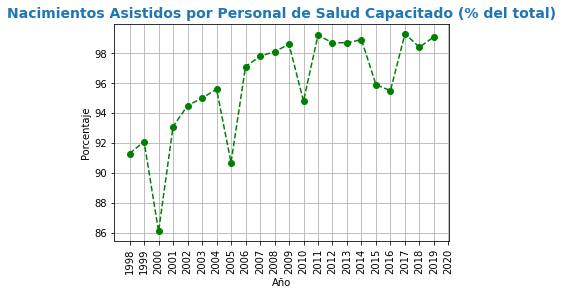

In [27]:
base_final=base_final.sort_values(by="date",ascending=True)
plt.plot('date','Nacidos_Asis_Personal', color = "green", marker = 'o', linestyle = 'dashed',data=base_final)
plt.xticks(rotation=90)
plt.title("Nacimientos Asistidos por Personal de Salud Capacitado (% del total)", loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.grid()

Con un porcentaje de 86% como el más bajo y 99% como el más alto, se puede notar que los nacimientos asistidos por personal de Salud Capacitado en el tiempo tienen un comportamiendo que tiende a crecer con el tiempo, si bien se presentan picos abajo en los años 2000, 2005, 2010, 2015 (puede ser un comportamiento de estacionalidad dado que son hechos repetitivos cada cinco años), igualmente si se trazara una línea de tendencia central lo que se podría evidenciar sería un crecimiento paulatino de la tasa (en porcentaje) a través del tiempo.

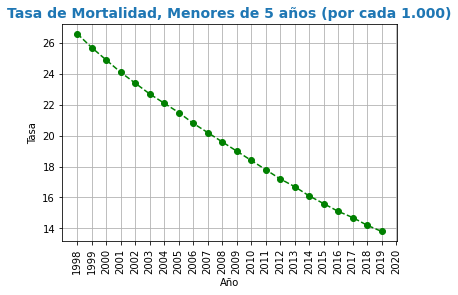

In [28]:
base_final=base_final.sort_values(by="date",ascending=True)
plt.plot('date','Tasa_Muertes_Menor_5años', color = "green", marker = 'o', linestyle = 'dashed',data=base_final)
plt.xticks(rotation=90)
plt.title("Tasa de Mortalidad, Menores de 5 años (por cada 1.000)", loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.xlabel("Año")
plt.ylabel("Tasa")
plt.grid()

Por su parte, la tasa de mortalidad para menores de 5 años ha venido cayendo muy notoriamente en el tiempo, en un lapso de 20 años a bajado más de 10 puntos porcentuales, por lo tanto se puede concluir que existirán diferente factores que produzcan un efecto en la tasa de mortalidad (teconología, avance en atención a la salud pública, mejores condiciones de vida, etc.) Lo importante es notar que la última cifra grabada (2019) describe una tasa mortalidad en menores de 5 años de cerca del 14%, lo cual resulta alentador. 

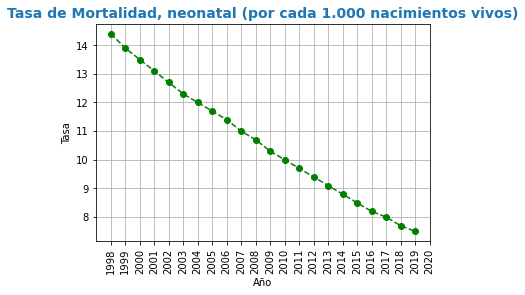

In [29]:
base_final=base_final.sort_values(by="date",ascending=True)
plt.plot('date','Tasa_Muertes_Neonatales', color = "green", marker = 'o', linestyle = 'dashed',data=base_final)
plt.xticks(rotation=90)
plt.title("Tasa de Mortalidad, neonatal (por cada 1.000 nacimientos vivos)", loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.xlabel("Año")
plt.ylabel("Tasa")
plt.grid()

Lo mismo, respecto de la tasa de mortalidad, neonatal el comportamiento es el mismo frente a la tasa de mortalidad con menores de 5 años, en este caso, se pasa de un 14% a menos de 8% en el año 2019, por lo tanto, se puede concluir que la tasa de mortalidad se reduce a la mitad.

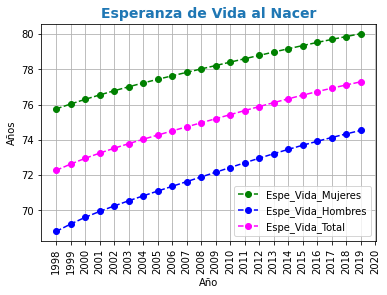

In [30]:
base_final=base_final.sort_values(by="date",ascending=True)
plt.plot('date','Espe_Vida_Mujeres', color = "green", marker = 'o', linestyle = 'dashed',data=base_final)
plt.plot('date','Espe_Vida_Hombres', color = "blue", marker = 'o', linestyle = 'dashed',data=base_final)
plt.plot('date','Espe_Vida_Total', color = "Magenta", marker = 'o', linestyle = 'dashed',data=base_final)
plt.xticks(rotation=90)
plt.legend(loc = 'lower right')
plt.title("Esperanza de Vida al Nacer", loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.xlabel("Año")
plt.ylabel("Años")
plt.grid()

Se realiza una gráfica que explica el comportamiento de la esperanza de vida total en Colombia, dividida por mujeres y hombres; aquí, las mujeres pueden esperar vivir más tiempo que los hombres con una edad que se acerca a los 80 años en el 2019, y por su parte, los hombres con una esperanza de vida que se hubica cerca de 75 años, la esperanza de vida total indica la información sin distinción de género, es así que se ubica en la mitad de estas dos líneas y refleja un promedio de 78 años para el año 2019 en Colombia. Además, se evidencia el comportamiento de todas las líneas de forma creciente y paulatina, lo cual indica que con el tiempo los individuos esperarán vivir más en la medida en que las condiciones del entorno estimulen una vida más larga para las personas. 

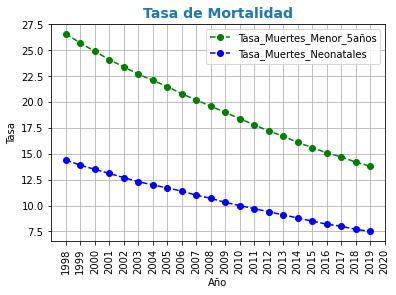

In [31]:
base_final=base_final.sort_values(by="date",ascending=True)
plt.plot('date','Tasa_Muertes_Menor_5años', color = "green", marker = 'o', linestyle = 'dashed',data=base_final)
plt.plot('date','Tasa_Muertes_Neonatales', color = "blue", marker = 'o', linestyle = 'dashed',data=base_final)
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.title("Tasa de Mortalidad", loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.xlabel("Año")
plt.ylabel("Tasa")
plt.grid()

Puede revisarse al mismo tiempo la tasa de mortalidad para menores de 5 años y la tasa de mortalidad para neonatales, en este caso, la caía de las dos tasas es notable, sin emabrgo, la tasa de muertes de menores de cinco años es más pronunciada que la otra, por cuanto puede concluirse que las muertes de los neonatales pueden ser más difíciles de controlar dado que esto también depende de las condiciones del embarazo para las mujeres. 

#**ESPECIFICACIÓN DEL MODELO**#
Teniendo en cuenta la información anterior, el modelo busca medir la relación existente entre los indicadores de Atención de las madres gestantes a la hora del parto con los indicadores de Tasa de mortalidad neonatal, Tasa de mortalidad en niños menores de cinco años, esperanza de vida tanto en mujeres como en hombres y esperanza de vida total. Es importante mencionar que la variable dependiente es la Atención médica a las madres gestantes, y por ende las demas variables seran las independietnes, obteniendo un modelo de la siguiente forma:

$Nacidos_Asis_Personal = \beta X_1 \beta_2 X^2_2 \beta_3 X^3_3 \beta_4^4_4 \beta_5^5_5$

**-Nacidos Asistencia Personal Capacitado:** Esta variable corresponde al porcentaje de nacidos que reciben una atención médica de personal capacitado durante el parto y postparto

**-Tasa de Mortalidad Neonatal:** Esta variable se puede considerar como una de las principales para el analisis del modelo, dado que las muertes de los niños en proceso de parto o días posteriores se puede dar por una mala atención médica en el momento del parto.

**-Tasa de Mortalidad en niños menores de cinco años:** Esta variable nos puede determinar una correlación positiva, toda vez que la atención de los niños en proceso de parto no solo se cuenta durante el momento, sino posterior al parto en los cuidados y atenciones que el bebé reciba, es por esto que esta variable nos puede indicar que las muertes se deben a una mala atención en el parto y posterior.

**-Esperanza de Vida Mujeres:** La esperanza de vida si bien en los primeros analisis no esta relacionada con nuestra variable principal, se toman como referencia para observar durante el modelo si efectivamente son independientes o presentan alguna correlación .

**-Esperanza de Vida Hombres:** La esperanza de vida si bien en los primeros analisis no esta relacionada con nuestra variable principal, se toman como referencia para observar durante el modelo si efectivamente son independientes o presentan alguna correlación .

**- Esperanza de vida Total:** Es la recopilación de esperanza de vida en mujeres y hombres

# Correlaciones entre las variables #

In [32]:
df_corr = base_final.corr(method='spearman')
df_corr

,Nacidos_Asis_Personal,Tasa_Muertes_Menor_5años,Tasa_Muertes_Neonatales,Espe_Vida_Mujeres,Espe_Vida_Hombres,Espe_Vida_Total
Nacidos_Asis_Personal,1.000000,-0.776052,-0.776052,0.776052,0.776052,0.776052
Tasa_Muertes_Menor_5años,-0.776052,1.000000,1.000000,-1.000000,-1.000000,-1.000000
Tasa_Muertes_Neonatales,-0.776052,1.000000,1.000000,-1.000000,-1.000000,-1.000000
Espe_Vida_Mujeres,0.776052,-1.000000,-1.000000,1.000000,1.000000,1.000000
Espe_Vida_Hombres,0.776052,-1.000000,-1.000000,1.000000,1.000000,1.000000
Espe_Vida_Total,0.776052,-1.000000,-1.000000,1.000000,1.000000,1.000000


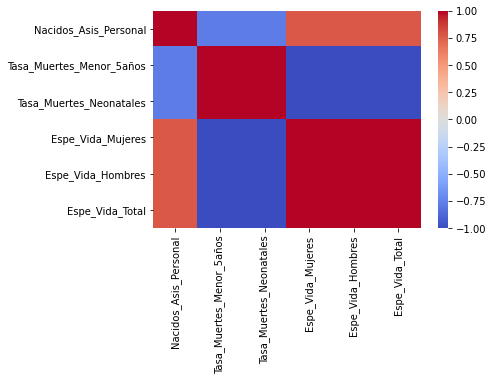

In [33]:
#Mapa de Calor Correlación 

sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            cmap='coolwarm')

El mapa de calor indica en una escala de colores (siendo rojo más relacionado y azul cero relacionado), en este caso podemos hacer uso de variables que estan fuertemente relacionadas y que son explicativas de las demás, ubicadas en la escala de 0.50 a 0.75. Los efectos esperados entre las vairables son: 

*   Espe_Vida_Total - Nacidos_Asis_Personal (+)
*   Tasa_muertes_menor_5años - Nacidos_Asis_Personal (-) 
*   Tasa_Muertes_Neonatales - Nacidos_Asis_Personal (-)

Se espera que en la medida en que un individuo sea nacido con asistencia de personal capacitado, su esperanza de vida sea mayor; al mismo tiempo, se espera que un individuo que nace con asistencia de personal capacitado, reduzca la tasa de mortalidad en menores de 5 años y en neonatales.  






In [34]:
base_final = base_final.reset_index()

base_final

,index,countryiso3code,date,Nacidos_Asis_Personal,Tasa_Muertes_Menor_5años,Tasa_Muertes_Neonatales,Espe_Vida_Mujeres,Espe_Vida_Hombres,Espe_Vida_Total
0,22,COL,1998,91.3,26.6,14.4,75.754,68.795,72.264
1,21,COL,1999,92.1,25.7,13.9,76.030,69.215,72.619
2,20,COL,2000,86.1,24.9,13.5,76.294,69.594,72.945
3,19,COL,2001,93.1,24.1,13.1,76.544,69.931,73.241
4,18,COL,2002,94.5,23.4,12.7,76.781,70.240,73.517
5,17,COL,2003,95.0,22.7,12.3,77.007,70.533,73.777
6,16,COL,2004,95.6,22.1,12.0,77.223,70.813,74.026
7,15,COL,2005,90.7,21.5,11.7,77.430,71.085,74.265
8,14,COL,2006,97.1,20.8,11.4,77.630,71.354,74.500
9,13,COL,2007,97.8,20.2,11.0,77.825,71.621,74.732


In [35]:
base_final.isnull().any()

index                       False
countryiso3code             False
date                        False
Nacidos_Asis_Personal        True
Tasa_Muertes_Menor_5años     True
Tasa_Muertes_Neonatales      True
Espe_Vida_Mujeres            True
Espe_Vida_Hombres            True
Espe_Vida_Total              True
dtype: bool

Al momento de hacer las regresiones obteniamos un error, que era que las variables contaban con algunos valores infinitos por lo cual se procede a eliminar esos valores infinitos para poder hacer las regresiones 

In [36]:
base_final = base_final.fillna(method='ffill')

In [37]:
base_final

,index,countryiso3code,date,Nacidos_Asis_Personal,Tasa_Muertes_Menor_5años,Tasa_Muertes_Neonatales,Espe_Vida_Mujeres,Espe_Vida_Hombres,Espe_Vida_Total
0,22,COL,1998,91.3,26.6,14.4,75.754,68.795,72.264
1,21,COL,1999,92.1,25.7,13.9,76.030,69.215,72.619
2,20,COL,2000,86.1,24.9,13.5,76.294,69.594,72.945
3,19,COL,2001,93.1,24.1,13.1,76.544,69.931,73.241
4,18,COL,2002,94.5,23.4,12.7,76.781,70.240,73.517
5,17,COL,2003,95.0,22.7,12.3,77.007,70.533,73.777
6,16,COL,2004,95.6,22.1,12.0,77.223,70.813,74.026
7,15,COL,2005,90.7,21.5,11.7,77.430,71.085,74.265
8,14,COL,2006,97.1,20.8,11.4,77.630,71.354,74.500
9,13,COL,2007,97.8,20.2,11.0,77.825,71.621,74.732


Ya quedaron todas las variables sin valores infinitos

In [38]:
base_final.isnull().any()

index                       False
countryiso3code             False
date                        False
Nacidos_Asis_Personal       False
Tasa_Muertes_Menor_5años    False
Tasa_Muertes_Neonatales     False
Espe_Vida_Mujeres           False
Espe_Vida_Hombres           False
Espe_Vida_Total             False
dtype: bool

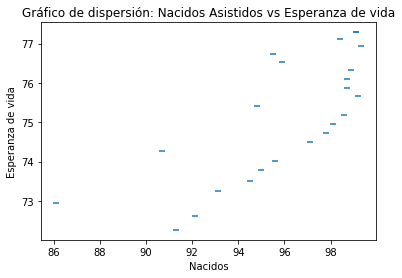

In [39]:
fig, ax = plt.subplots()
ax.scatter(base_final["Nacidos_Asis_Personal"], base_final["Espe_Vida_Total"], marker="_")
plt.title("Gráfico de dispersión: Nacidos Asistidos vs Esperanza de vida")
plt.xlabel("Nacidos")
plt.ylabel("Esperanza de vida")

plt.show()

Con la información de la gráfica, puede concluirse que existe una correlación positiva entre la esperanza de vida de un individuo y el hecho de nacer con asistencia de personal autorizado, esta variable es explicativa positivamente y puede notarse con la ubicación de los datos. 

In [40]:
import statsmodels.api as sm
from scipy import stats

X = base_final.iloc[:,[5]]
y = base_final.Nacidos_Asis_Personal

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                              OLS Regression Results                             
Dep. Variable:     Nacidos_Asis_Personal   R-squared:                       0.575
Model:                               OLS   Adj. R-squared:                  0.555
Method:                    Least Squares   F-statistic:                     28.43
Date:                   Fri, 16 Jul 2021   Prob (F-statistic):           2.75e-05
Time:                           06:38:10   Log-Likelihood:                -50.753
No. Observations:                     23   AIC:                             105.5
Df Residuals:                         21   BIC:                             107.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Analizando la relación que pueda existir entre ser nacido con asistencia de personal capacitado y la tasa de muertes neonatales, se puede concluir que, cuando más se fortalezca el sistema de salud a la maternidad, la tasa de muertes neonatales tiende a disminuir. Esto tiene sentido porque si se brinda una mejor atención a la mujer en estado de embarazo y se asiste profesionalmente, la mortalidad de neonatales disminuirá. 

## Regresión Lineal ##

Modelo 1 con regresión lineal
Los coeficientes del modelo son: [-1.2042234]
El intercepto es: 108.62171869107976
El tiempo de ejecución fue de 0.005482896000000181 segundos
El R2 del modelo es: 0.5751637826493443
El error cuadratico medio es 4.832660544575829
[91.28090166 91.88301337 92.36470273 92.84639209 93.32808145 93.80977081
 94.17103783 94.53230486 94.89357188 95.37526124 95.73652826 96.21821762
 96.57948464 96.94075167 97.30201869 97.66328571 98.02455273 98.38581975
 98.74708677 98.98793145 99.34919847 99.59004316 99.59004316]


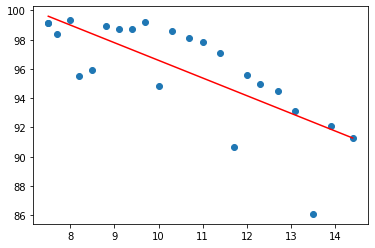

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import time
from sklearn.metrics import mean_squared_error, r2_score

y = base_final['Nacidos_Asis_Personal']

#Modelo 1 (Nacidos con asistencia médica contra Tasa de mortalidad neonatales)
modelo_1 = LinearRegression()
feature_cols = ['Tasa_Muertes_Neonatales']
X_modelo_1 = base_final.loc[:, feature_cols]

start_time = time.process_time()
modelo_1.fit(X_modelo_1, y)
y_pred1 = modelo_1.predict(X_modelo_1)

print('Modelo 1 con regresión lineal')
print('Los coeficientes del modelo son:', modelo_1.coef_)
print('El intercepto es:', modelo_1.intercept_)
print('El tiempo de ejecución fue de', time.process_time() - start_time, 'segundos')
print('El R2 del modelo es:', r2_score(y, y_pred1))
print('El error cuadratico medio es', mean_squared_error(y, y_pred1))
print(y_pred1)

plt.scatter(X_modelo_1, y)
plt.plot(X_modelo_1, y_pred1, color = 'red')

Ahora, llevando la regresión lineal anteorirmente mencionada con LinearRegression, mencionamos los resultados respecto del error cuadrático médio, el rcuadrado, el intercepto y el coeficiente. Todo esto argumenta que nuestra regresión presenta resultados coherentes frente a la información suministrada. Para visualizar esto, el gráfico de dispersión añade una correlación entre las variables mencionada y concluye que el efecto es negativo y está estrechamente relacionado. 

## Regresión Lasso ##

Modelo lasso
Los coeficientes son [-0.62029273]
Los interceptos son 107.95695523713562
El tiempo de ejecución es 0.0048095089999993235 segundos
El error cuadratico dentro de muestra es 0.578672968214875
El error cuadratico fuera de muestra es 4.792742331548012
[91.45716872 92.01543217 92.51166635 93.00790053 93.44210544 93.87631035
 94.24848599 94.62066162 95.05486653 95.42704217 95.7992178  96.17139344
 96.54356907 96.91574471 97.28792035 97.59806671 97.97024234 98.28038871
 98.59053507 98.83865216 99.14879852 99.39691561 99.39691561]


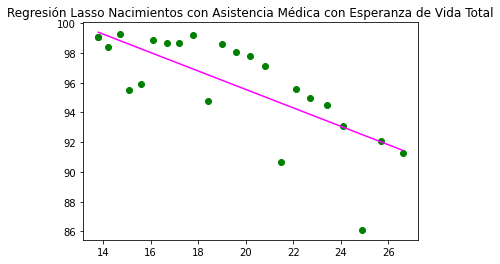

In [42]:
import time
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

y = base_final["Nacidos_Asis_Personal"]
lasso_model = Lasso(alpha = 0.5)
start_time = time.process_time()
feature_cols = ["Tasa_Muertes_Menor_5años"]
X_Lasso_uno = base_final.loc[:, feature_cols]

lasso_model.fit(X_Lasso_uno, y)
y_pred = lasso_model.predict(X_Lasso_uno)

print('Modelo lasso')
print('Los coeficientes son', lasso_model.coef_)
print('Los interceptos son', lasso_model.intercept_)
print('El tiempo de ejecución es', time.process_time() - start_time, 'segundos')
print('El error cuadratico dentro de muestra es', r2_score(y, y_pred))
print('El error cuadratico fuera de muestra es', mean_squared_error(y, y_pred))
print(y_pred)

plt.scatter(X_Lasso_uno, y, color = "green")
plt.title("Regresión Lasso Nacimientos con Asistencia Médica con Esperanza de Vida Total")
plt.plot(X_Lasso_uno, y_pred, color = "magenta")

Llevando la regresión a un análisis con la variables Tasa_muertes_menor_5años, podemos relacionar el valor del coeficiente que será de -0.62 y que además, con un r cuadrado de 0.57, la variable es explicativa en el modelo y como se esperaba, tienen un efecto negativo por lo mismo, cuanta más y mejor sea la asistencia profesional en el embarazo, la tasa de mortalidad disminuirá. 

## Regresión Lasso con variables que pueden no ser tan explicativas ##

Modelo lasso
Los coeficientes son [1.45311276]
Los interceptos son -13.146159876807374
El tiempo de ejecución es 0.004614174000000304 segundos
El error cuadratico dentro de muestra es 0.5643608159831773
El error cuadratico fuera de muestra es 4.9555480683785875
[91.8615809  92.37743593 92.85115069 93.28127207 93.68233119 94.06014051
 94.42196559 94.76925954 95.11074104 95.4478632  95.78207913 96.11774818
 96.45341723 96.78908628 97.11894288 97.44298702 97.75831249 98.06201306
 98.35408873 98.63453949 98.90191224 99.16056631 99.16056631]


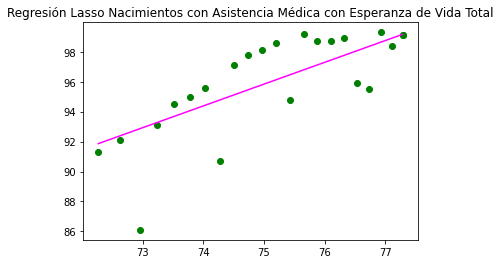

In [43]:
y = base_final["Nacidos_Asis_Personal"]
lasso_model = Lasso(alpha = 0.5)
start_time = time.process_time()
feature_cols = ["Espe_Vida_Total"]
X_Lasso_uno = base_final.loc[:, feature_cols]

lasso_model.fit(X_Lasso_uno, y)
y_pred = lasso_model.predict(X_Lasso_uno)

print('Modelo lasso')
print('Los coeficientes son', lasso_model.coef_)
print('Los interceptos son', lasso_model.intercept_)
print('El tiempo de ejecución es', time.process_time() - start_time, 'segundos')
print('El error cuadratico dentro de muestra es', r2_score(y, y_pred))
print('El error cuadratico fuera de muestra es', mean_squared_error(y, y_pred))
print(y_pred)

plt.scatter(X_Lasso_uno, y, color = "green")
plt.title("Regresión Lasso Nacimientos con Asistencia Médica con Esperanza de Vida Total")
plt.plot(X_Lasso_uno, y_pred, color = "magenta")

La esperanza de vida total puede verse afectada por la asistencia profesional en el embarazo, si las condiciones de vida mejoran para los individuos en materia de salud pública, se espera que estos mismos vivan más. (No sólo por preservar la vida del nacido, sino también, de la mujer en embarazo) 

## Regresión con todas las variables ##



Modelo 2 con regresión lineal
Los coeficientes del modelo son: [ 1.00000000e+00  2.94087808e-15 -3.96857948e-15  8.14317565e-16]
El intercepto es: -8.526512829121202e-14
El tiempo de ejecución fue de 0.004134105999999527 segundos
El R2 del modelo es: 1.0
El error cuadratico medio es 2.1072875659469115e-28


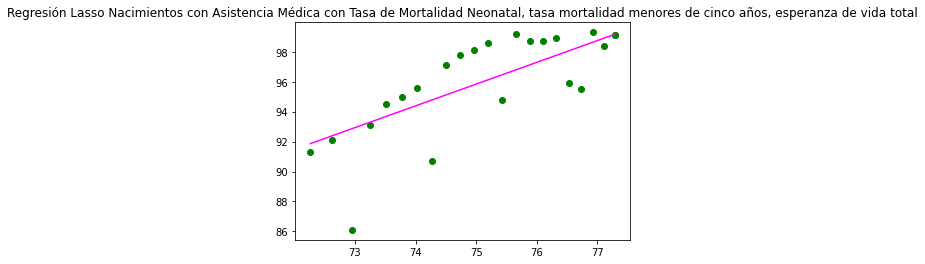

In [44]:
modelo_2 = LinearRegression()
feature_cols = ['Nacidos_Asis_Personal', 'Tasa_Muertes_Menor_5años', 'Tasa_Muertes_Neonatales', 'Espe_Vida_Total']
X_modelo_2 = base_final.loc[:, feature_cols]

start_time = time.process_time()
modelo_2.fit(X_modelo_2, y)
y_pred2 = modelo_2.predict(X_modelo_2)

print('Modelo 2 con regresión lineal')
print('Los coeficientes del modelo son:', modelo_2.coef_)
print('El intercepto es:', modelo_2.intercept_)
print('El tiempo de ejecución fue de', time.process_time() - start_time, 'segundos')
print('El R2 del modelo es:', r2_score(y, y_pred2))
print('El error cuadratico medio es', mean_squared_error(y, y_pred2))

plt.scatter(X_Lasso_uno, y, color = "green")
plt.title("Regresión Lasso Nacimientos con Asistencia Médica con Tasa de Mortalidad Neonatal, tasa mortalidad menores de cinco años, esperanza de vida total")
plt.plot(X_Lasso_uno, y_pred, color = "magenta")


## Regresión Lasso con multiples variables ##

Modelo de regresión Lasso con multiples variables
Los coeficientes del modelo son: [ 0.         -0.         -0.         -0.         -0.04922393 -0.
 -0.00080633  0.          0.0105694  -0.01652485]
El intercepto es: 201.19573193188359
El tiempo de ejecución fue de 0.0041662410000000705 segundos
El R2 del modelo es: 0.6400157805966393


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.63590525954254, tolerance: 0.026163304347826103
  positive)


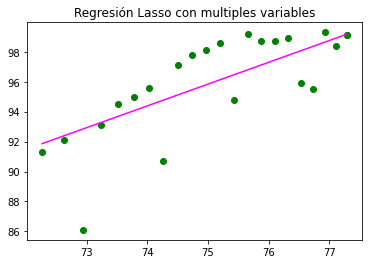

In [45]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

y2 = base_final['Nacidos_Asis_Personal']
X1 = base_final['Tasa_Muertes_Menor_5años']
X2 = base_final['Tasa_Muertes_Neonatales']
X3 = base_final['Espe_Vida_Total']

X2 = np.array([X1,X2,X3]).T
ylassM = np.array(y2)

Lasso_p2 = PolynomialFeatures(degree=2)
Lasso_p2_X = Lasso_p2.fit_transform(X2)

Lasso_pol2 = Lasso(alpha=0.5)
start_time = time.process_time()
Lasso_pol2.fit(Lasso_p2_X,ylassM)

Predict_Y = Lasso_pol2.predict(Lasso_p2_X)

print('Modelo de regresión Lasso con multiples variables')
print('Los coeficientes del modelo son:', Lasso_pol2.coef_)
print('El intercepto es:', Lasso_pol2.intercept_)
print('El tiempo de ejecución fue de', time.process_time() - start_time, 'segundos')
print('El R2 del modelo es:', r2_score(ylassM, Predict_Y))

plt.scatter(X_Lasso_uno, y, color = "green")
plt.title("Regresión Lasso con multiples variables")
plt.plot(X_Lasso_uno, y_pred, color = "magenta")


## Modelo de Regresión ElasticNet con multiples variables ##

Modelo de regresión ElasticNet con multiples variables
Los coeficientes del modelo son: [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.56345146e-02 -9.41479995e-07 -3.71457834e-11 -1.15985282e-15
 -6.83328684e-20 -0.00000000e+00]
El intercepto es: 100.50868659068544
El tiempo de ejecución fue de 0.0026413450000006833 segundos
El R2 del modelo es: 0.9995293404306425


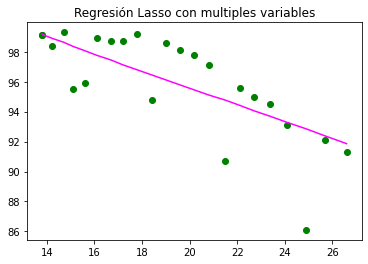

In [47]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

yE = base_final['Tasa_Muertes_Menor_5años']
XE = base_final['Tasa_Muertes_Neonatales']
XE = base_final['Espe_Vida_Mujeres']
XE = base_final['Espe_Vida_Hombres']

XE = np.array([XE,XE,XE]).T
yElastic = np.array(yE)

Elastic_p3 = PolynomialFeatures(degree=2)
Elastic_p3_X = Elastic_p3.fit_transform(XE)

Elastic_pol3 = ElasticNet(alpha=1)
start_time3 = time.process_time()
Elastic_pol3.fit(Elastic_p3_X, yElastic)

Predict_YEL = Elastic_pol3.predict(Elastic_p3_X)

print('Modelo de regresión ElasticNet con multiples variables')
print('Los coeficientes del modelo son:', Elastic_pol3.coef_)
print('El intercepto es:', Elastic_pol3.intercept_)
print('El tiempo de ejecución fue de', time.process_time() - start_time3, 'segundos')
print('El R2 del modelo es:', r2_score(yElastic, Predict_YEL))

plt.scatter(yElastic, y, color = "green")
plt.title("Regresión Lasso con multiples variables")
plt.plot(yElastic, y_pred, color = "magenta")

##**WEB SCRAPING**##

Esta sección se realiza con el fin de hallar articulos y encontrar alguna relación con el analisis anterior, con el fin de demostrar y dar mayor solidez al proyecto.

Inicialmente se importan las librerias necesarias para la limpieza y la Web Scraping del documento

In [48]:
import requests as rq
from bs4 import BeautifulSoup
import requests
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stoplist = stopwords.words('spanish')
!pip install contexto
import contexto
from contexto.limpieza import limpieza_texto,lista_stopwords,lista_nombres
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from contexto.vectorizacion import  VectorizadorFrecuencias
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
!pip install matplotlib==3.1.3

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 143kB 24.8MB/s 
     |████████████████████████████████| 2.6MB 31.8MB/s 
     |████████████████████████████████| 1.9MB 41.5MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
     |████████████████████████████████| 10.3MB 40.8MB/s 
     |████████████████████████████████| 368kB 39.5MB/s 
     |████████████████████████████████| 22.3MB 43.3MB/s 
     |████████████████████████████████| 92kB 11.6MB/s 
     |████████████████████████████████| 23.9MB 131kB/s 
     |████████████████████████████████| 1.5MB 36.5MB/s 
     |████████████████████████████████| 49.9MB 59kB/s 
     |████████████████████████████████| 5.6MB 33.5MB/s 
     |████████████████████████████████| 337kB 43.3MB/s 
     |████████████████████████████████| 2.7MB 37.8MB/s 


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


     |████████████████████████████████| 13.1MB 202kB/s 
ERROR: contexto 0.2.0 has requirement matplotlib>=3.3.4, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2


In [49]:
!pip install PyPDF2
import PyPDF2

In [52]:
FilePDFObj = open('Articulo CIFE USTA.pdf', 'rb') 
Readpdf = PyPDF2.PdfFileReader(FilePDFObj)
print(Readpdf.numPages)

36


El comando `Readpdf.numPages` permite conocer la cantidad de páginas que dispone el articulo. Ademas, se realiza el proceso para tener en cuenta el documento como PDF.

Lo siguiente que se realiza es la página que se desea analizar o "leer"

In [53]:
Paginas = Readpdf.getPage(10)
print(Paginas.extractText())

   Cuadro 2. Variables utilizadas en el análisis de regresión  Variables Definición Dependientes: Atención prenatal profesional 1 = fue atendida por un doctor  0 = otro caso   Atención posparto 1 = recibió atención posparto  0 = no recibió  Controles Prenatales óptimos 1 = tuvo al menos  cuatro controles prenatales  0 =  tuvo menos de cuatro controles prenatales.  Parto institucional 1 = tuvo el parto en una institución prestadora de servicios de salud  0 = tuvo parto en otro lugar Independientes Edad de la madre Es la edad de la madre clasificada en los siguientes rangos: 1 = tiene entre 13 y 17 años  2 = tiene entre 18 y 24 años  3 =  tiene entre 25 y 34 años  4 = tiene entre 35 y 49 años  Nivel educativo de la madre Se refiere al máximo nivel educativo alcanzado:  1 = ninguno 2 = primaria 3 = secundaria 4 = superior  Ocupación de la madre   1 = está empleada 0 =  no lo está Decisión sobre el propio cuidado médico  1 = la mujer decide  2 = la mujer decide en compañía de otra persona 

In [54]:
P = Paginas.extractText()
P

'   Cuadro 2. Variables utilizadas en el análisis de regresión  Variables Definición Dependientes: Atención prenatal profesional 1 = fue atendida por un doctor  0 = otro caso   Atención posparto 1 = recibió atención posparto  0 = no recibió  Controles Prenatales óptimos 1 = tuvo al menos  cuatro controles prenatales  0 =  tuvo menos de cuatro controles prenatales.  Parto institucional 1 = tuvo el parto en una institución prestadora de servicios de salud  0 = tuvo parto en otro lugar Independientes Edad de la madre Es la edad de la madre clasificada en los siguientes rangos: 1 = tiene entre 13 y 17 años  2 = tiene entre 18 y 24 años  3 =  tiene entre 25 y 34 años  4 = tiene entre 35 y 49 años  Nivel educativo de la madre Se refiere al máximo nivel educativo alcanzado:  1 = ninguno 2 = primaria 3 = secundaria 4 = superior  Ocupación de la madre   1 = está empleada 0 =  no lo está Decisión sobre el propio cuidado médico  1 = la mujer decide  2 = la mujer decide en compañía de otra persona

Después de analizar y leer la página que se necesita, se procede a reealizar la limpieza del documento con el fin de poder interactuar y realizar distintos análisis del articulo.

In [55]:
Texto_Low = P.lower()
Texto_Tokenizado = Texto_Low.split()

In [ ]:
texto_token = word_tokenize(Texto_Low)
texto_token

In [ ]:
Stop_Words_Incuidas = ["=", "1", "0", "Variables", "Definición", "Dependientes", "Independientes", "Cuadro", "2", "utilizadas", "en", "el", "análisis", "regresión", "4", "13", "17", "18", "24", "3", "25", "34", "35", "49", "Se", "u", "Es", "tuvo", "otro", "tiene", "entre", ",", ".", "(", ")", ":", "1=", "5", "11"]
stoplist = stoplist+Stop_Words_Incuidas
stoplist

In [ ]:
texto_stop = [palabra for palabra in texto_token if palabra not in stoplist]
texto_stop

Los siguientes procesos que se realizan buscan cambiar la cadena de las palabras que presenta el articulo, dado que se encuentra como lista y no como cadena de datos.

In [59]:
text=(texto_stop)
type(text)

list

In [60]:
cadena = ""
for palabra in text:
  cadena = cadena + palabra + " "
print(cadena)

cuadro 2. variables variables definición dependientes atención prenatal profesional atendida doctor caso atención posparto recibió atención posparto recibió controles prenatales óptimos menos cuatro controles prenatales menos cuatro controles prenatales parto institucional parto institución prestadora servicios salud parto lugar independientes edad madre edad madre clasificada siguientes rangos años años años años nivel educativo madre refiere máximo nivel educativo alcanzado ninguno primaria secundaria superior ocupación madre empleada decisión propio cuidado médico mujer decide mujer decide compañía persona esposo persona decide mujer cuida condición económica hogar indicador nivel riqueza hogar según quintiles poblacionales bienestar riqueza bajo bajo medio alto alto convivencia madre pareja vive pareja caso afiliación régimen seguridad salud cuatro categorías afiliación sistema seguridad social salud régimen contributivo iss eps 


<function matplotlib.pyplot.show>

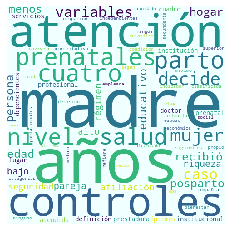

In [61]:
wordcould = WordCloud(background_color='azure', width=480, height=480, margin=0,).generate(cadena)

plt.imshow(wordcould, interpolation='nearest')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show

Como se puede observar en la nube de palabras, existe relación con algunas menciones del articulo y el proyecto realizado, especialmente en la atención a las mujeres gestantes y por consiguiente los años de aquellas mujeres. Adicionalmente, se hace mención a un control optimo del desarrollo prenatal en mujeres con condición de embarazo. 